In [1]:
import os
import keras
import sklearn
import numpy as np
from ..scripts import tools

Using TensorFlow backend.


Keras Version:  2.2.4


J:\Python\envs\tensorflow_env\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
def extract_all_features(main_scenes_dir,folders=None):
    if folders == None: folders=os.listdir(main_scenes_dir)
    labels              = []
    zero_crossing_rate  = []
    spectral_centroid   = []
    spectral_bandwidth  = []
    spectral_contrast   = []
    spectral_flatness   = []
    spectral_rolloff    = []
    melspectrum         = []
    mfcc                = []
    for label, folder in enumerate(folders):
        files = os.listdir(os.path.join(main_scenes_dir,folder))
        for file in files:
            tools.progress(folder,folders,file)
            labels.append(label)
            audio = tools.load_audio(os.path.join(main_scenes_dir,folder,file))
            S = tools.spectrum(audio)
            zero_crossing_rate.append(tools.zero_crossing_rate(audio))
            spectral_centroid.append(tools.spectral_centroid(S))
            spectral_bandwidth.append(tools.spectral_bandwidth(S))
            spectral_contrast.append(tools.spectral_contrast(S))
            spectral_flatness.append(tools.spectral_flatness(S))
            spectral_rolloff.append(tools.spectral_rolloff(S))
            melspectrum.append(tools.melspectrum(S))
            mfcc.append(tools.mfcc(S,mels=50))
    np.save(os.path.join(save_features_dir,"labels.npy"),arr=labels)
    np.save(os.path.join(save_features_dir,"zero_crossing_rate.npy"),arr=zero_crossing_rate)
    np.save(os.path.join(save_features_dir,"spectral_centroid.npy"),arr=spectral_centroid)
    np.save(os.path.join(save_features_dir,"spectral_bandwidth.npy"),arr=spectral_bandwidth)
    np.save(os.path.join(save_features_dir,"spectral_contrast.npy"),arr=spectral_contrast)
    np.save(os.path.join(save_features_dir,"spectral_flatness.npy"),arr=spectral_flatness)
    np.save(os.path.join(save_features_dir,"spectral_rolloff.npy"),arr=spectral_rolloff)
    np.save(os.path.join(save_features_dir,"melspectrum.npy"),arr=melspectrum)
    np.save(os.path.join(save_features_dir,"mfcc.npy"),arr=mfcc)
    
def compile_features(X):
    new_X=np.zeros([len(X[0]),len(X)])
    for i in range(len(X[0])):
        for j in range(len(X)):
            new_X[i,j] = X[j,i]
    return new_X


def batch_train_models(features_dir,feature_list, classifiers, label_names, batch_size=32,n_epochs=100):
    Y = np.load(os.path.join(features_dir,"labels.npy"))
    Y = keras.utils.to_categorical(Y,num_classes=len(label_names)) 
    for feature in features:
        X = np.load(os.path.join(features_dir,feature+".npy"))
        X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.2)
        input_dim=len(X_train[0])
        for classifier in classifiers:
            print("Training        ")
            classifier.set_name('DNN_'+feature+'_'+classifier.name)
            classifier.model.fit(
                x                = X_train,
                y                = Y_train,
                batch_size       = batch_size,
                epochs           = n_epochs,
                callbacks        = classifier.set_callbacks(),
                validation_split = 0.20,
                shuffle          = True,    
                verbose          = 0
            )
            print("Testing      ",end='\r')
            output_tensors, predictions, true = classifier.test(X_test, Y_test)
            classifier.analysis(output_tensors, predictions, true)
            print("Finished    ",end='\r')

In [3]:
main_scenes_dir = 'J:\\DataOffline\\Datasets\\SOUND_SCENES_AUDIO_ORIGINAL'
scenes = os.listdir(main_scenes_dir)
litis_scenes = [ scene for scene in scenes if scene[:5]=="litis"]
tut17_scenes = [ scene for scene in scenes if scene[:5]=="tut17"]
tut18_scenes = [ scene for scene in scenes if scene[:5]=="tut18"]

In [79]:
extract_all_features(main_scenes_dir,tut18_scenes)

In [195]:
extract_all_features(main_scenes_dir,tut17_scenes)

Classifier Created!
Training
Accuracy: 22.01%                                         
                           precision    recall  f1-score   support

           tut17_00_beach       0.00      0.00      0.00        64
             tut17_01_bus       0.11      0.02      0.03        65
            tut17_02_cafe       0.00      0.00      0.00        66
             tut17_03_car       0.40      0.90      0.55        62
     tut17_04_city_center       0.00      0.00      0.00        60
     tut17_05_forest_path       0.00      0.00      0.00        63
   tut17_06_grocery_store       0.15      0.47      0.22        62
            tut17_07_home       0.33      0.60      0.42        68
         tut17_08_library       0.18      0.35      0.23        49
   tut17_09_metro_station       0.16      0.34      0.22        67
          tut17_10_office       0.07      0.02      0.02        66
            tut17_11_park       0.11      0.21      0.14        63
tut17_12_residential_area       0.00     

Training
Accuracy: 89.21%                                         
                           precision    recall  f1-score   support

           tut17_00_beach       0.84      0.93      0.88        69
             tut17_01_bus       0.88      0.96      0.92        52
            tut17_02_cafe       0.92      0.98      0.95        61
             tut17_03_car       0.98      0.94      0.96        63
     tut17_04_city_center       0.94      0.91      0.92        53
     tut17_05_forest_path       0.86      0.94      0.90        52
   tut17_06_grocery_store       0.85      0.95      0.90        63
            tut17_07_home       0.95      0.80      0.87        65
         tut17_08_library       0.91      0.91      0.91        65
   tut17_09_metro_station       0.85      0.73      0.79        60
          tut17_10_office       0.87      0.98      0.92        62
            tut17_11_park       0.82      0.86      0.84        63
tut17_12_residential_area       0.81      0.70      0.75     

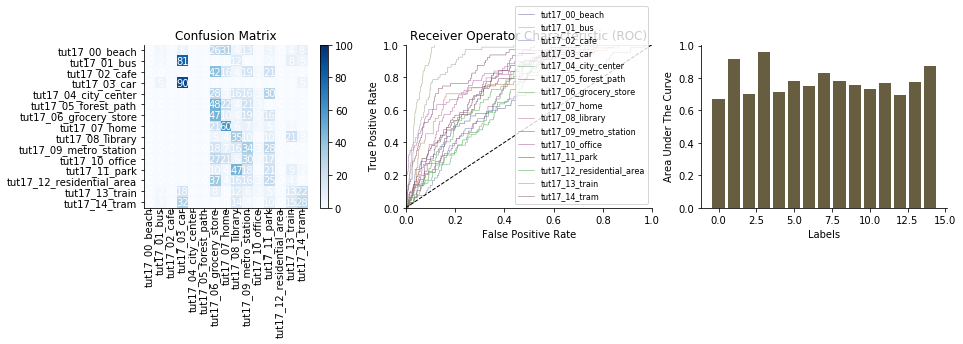

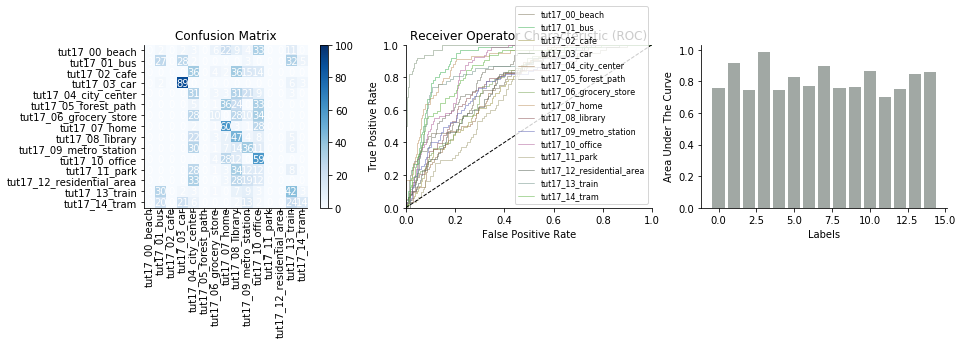

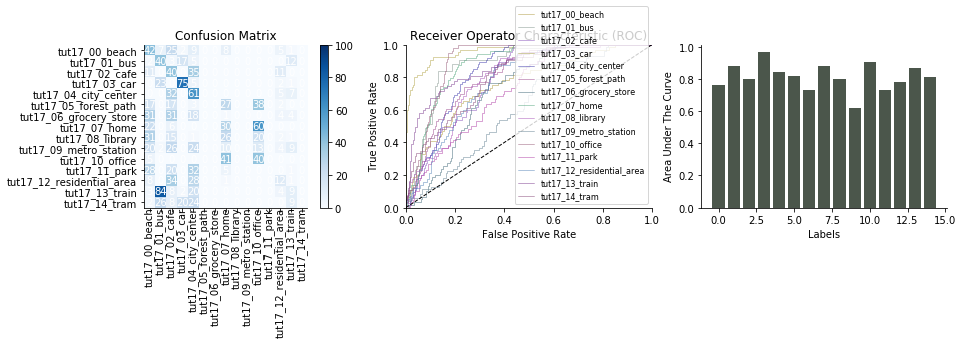

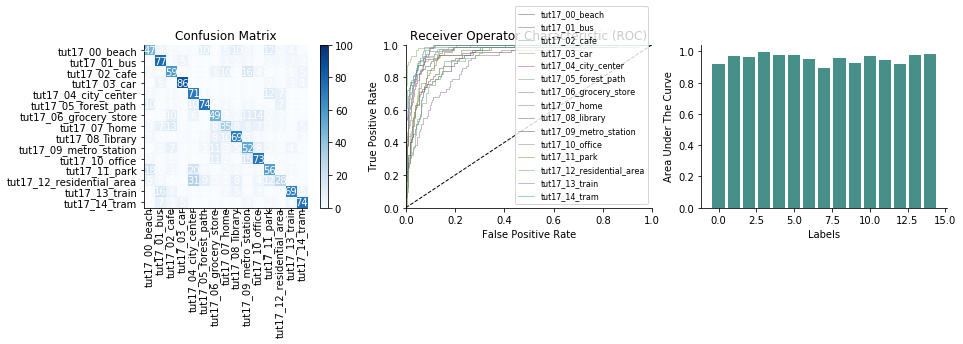

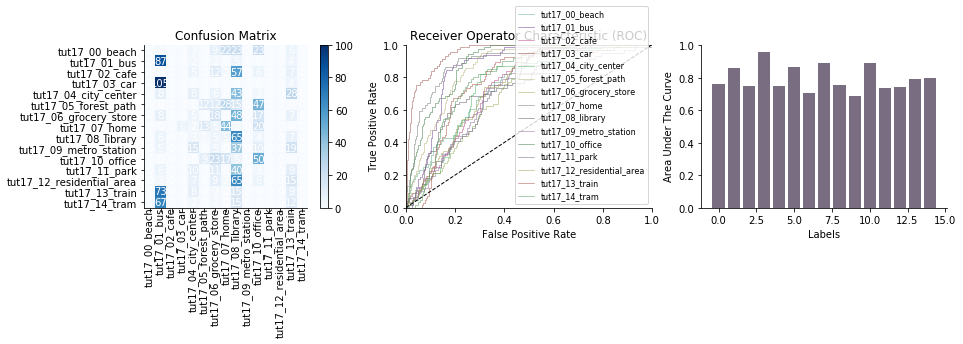

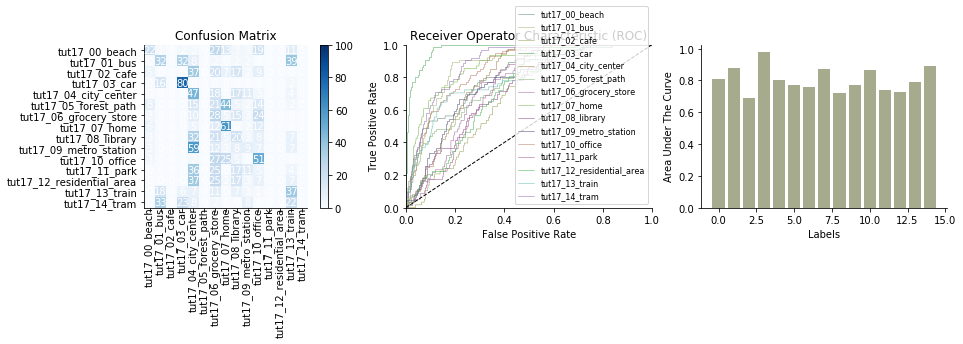

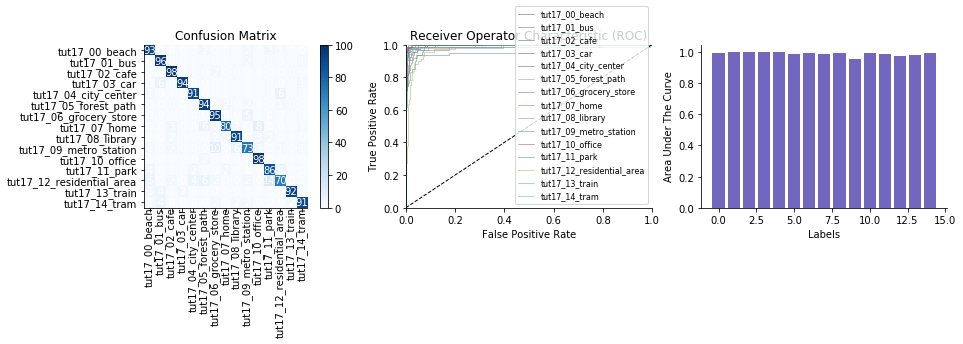

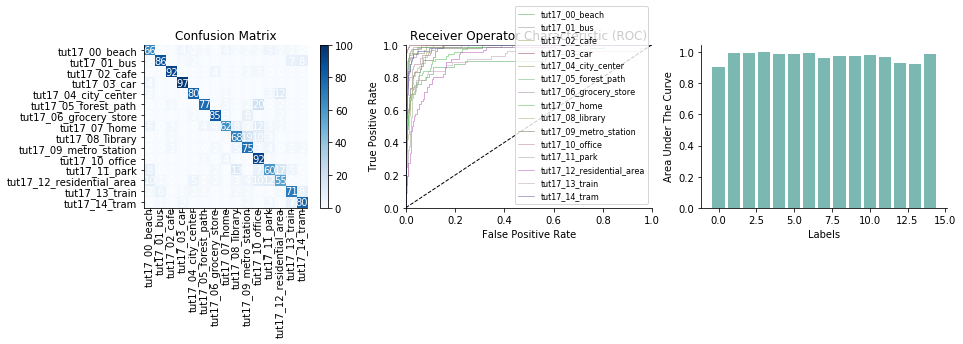

In [198]:
# PRELIMINARES 1: MODELOS FIJOS
features_dir= "J:\\DataOffline\\Datasets\\SOUND_SCENES_ALLFEATURES\\TUT17"
features = [
    "zero_crossing_rate",
    "spectral_centroid",
    "spectral_bandwidth",
    "spectral_contrast",
    "spectral_flatness",
    "spectral_rolloff",
    "melspectrum",
    "mfcc"    
]
train_fix_models(feature_list=features, batch_size=32,n_epochs=200)

In [9]:
# BUILD CLASSIFIERS FOR PRELIMINARY TESTS 2:
input_dim = 50
label_names= tut17_scenes
classifiers = []

# MODEL 25 - 25
classifier = tools.Classifier(name='25_25',labels=label_names)   
classifier.model = keras.Sequential()
classifier.model.add(keras.layers.Dense(activation="relu", units=25, input_dim=input_dim))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="relu", units=25))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="softmax",units=len(label_names)))
classifier.model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )
classifiers.append(classifier)

# MODEL 100 - 100
classifier = tools.Classifier(name='100_100',labels=label_names)   
classifier.model = keras.Sequential()
classifier.model.add(keras.layers.Dense(activation="relu", units=100, input_dim=input_dim))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="relu", units=100))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="softmax",units=len(label_names)))
classifier.model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )
classifiers.append(classifier)

# MODEL 200 - 200
classifier = tools.Classifier(name='200_200',labels=label_names)   
classifier.model = keras.Sequential()
classifier.model.add(keras.layers.Dense(activation="relu", units=200, input_dim=input_dim))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="relu", units=200))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="softmax",units=len(label_names)))
classifier.model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )
classifiers.append(classifier)

# MODEL 50
classifier = tools.Classifier(name='50',labels=label_names)   
classifier.model = keras.Sequential()
classifier.model.add(keras.layers.Dense(activation="relu", units=50, input_dim=input_dim))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="softmax",units=len(label_names)))
classifier.model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )
classifiers.append(classifier)

# MODEL 50 - 50 - 50
classifier = tools.Classifier(name='50_50_50',labels=label_names)   
classifier.model = keras.Sequential()
classifier.model.add(keras.layers.Dense(activation="relu", units=50, input_dim=input_dim))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="relu", units=50, input_dim=input_dim))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="relu", units=50, input_dim=input_dim))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="softmax",units=len(label_names)))
classifier.model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )
classifiers.append(classifier)

# MODEL 50 - 50 - 50 - 50
classifier = tools.Classifier(name='50_50_50_50',labels=label_names)   
classifier.model = keras.Sequential()
classifier.model.add(keras.layers.Dense(activation="relu", units=50, input_dim=input_dim))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="relu", units=50, input_dim=input_dim))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="relu", units=50, input_dim=input_dim))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="relu", units=50, input_dim=input_dim))
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Dense(activation="softmax",units=len(label_names)))
classifier.model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )
classifiers.append(classifier)

Classifier Created!
Classifier Created!
Classifier Created!
Classifier Created!
Classifier Created!
Classifier Created!


Training        
Accuracy: 66.77%                                         
                           precision    recall  f1-score   support

           tut17_00_beach       0.44      0.42      0.43        52
             tut17_01_bus       0.70      0.74      0.72        57
            tut17_02_cafe       0.75      0.81      0.78        64
             tut17_03_car       0.86      0.78      0.82        72
     tut17_04_city_center       0.76      0.81      0.78        77
     tut17_05_forest_path       0.73      0.78      0.75        51
   tut17_06_grocery_store       0.85      0.86      0.85        70
            tut17_07_home       0.47      0.56      0.51        52
         tut17_08_library       0.59      0.57      0.58        63
   tut17_09_metro_station       0.76      0.53      0.63        49
          tut17_10_office       0.65      0.91      0.76        67
            tut17_11_park       0.45      0.45      0.45        56
tut17_12_residential_area       0.49      0.32      0

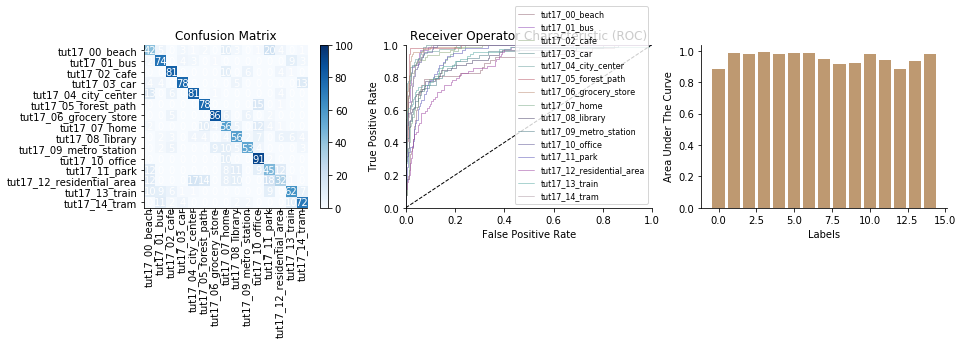

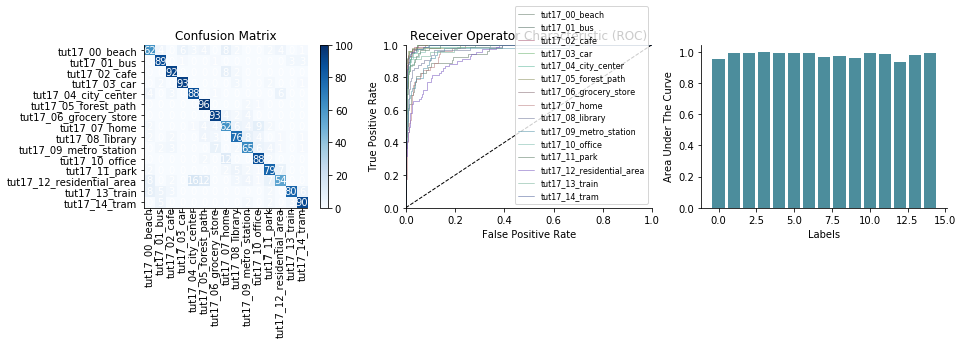

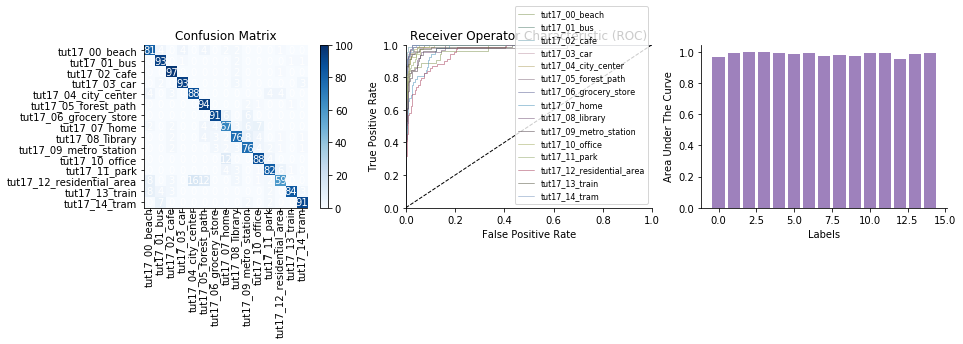

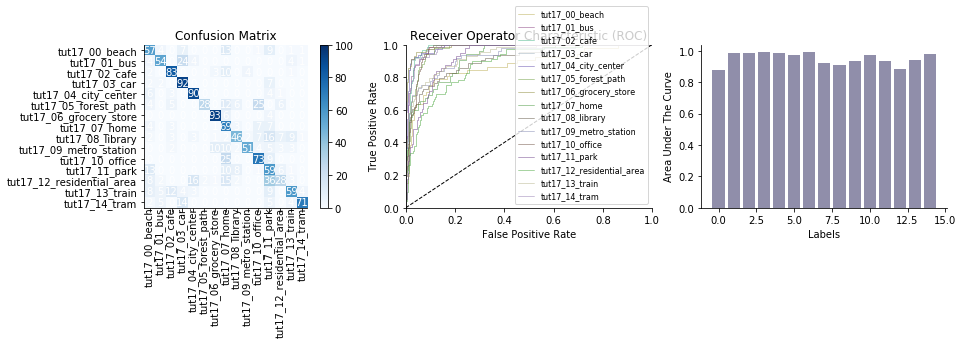

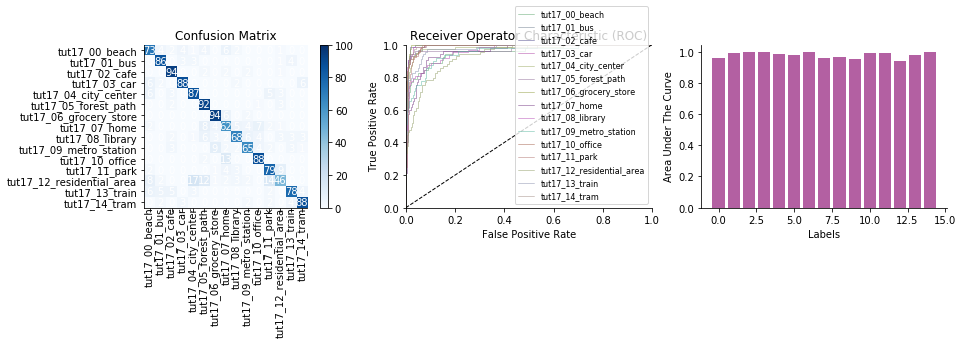

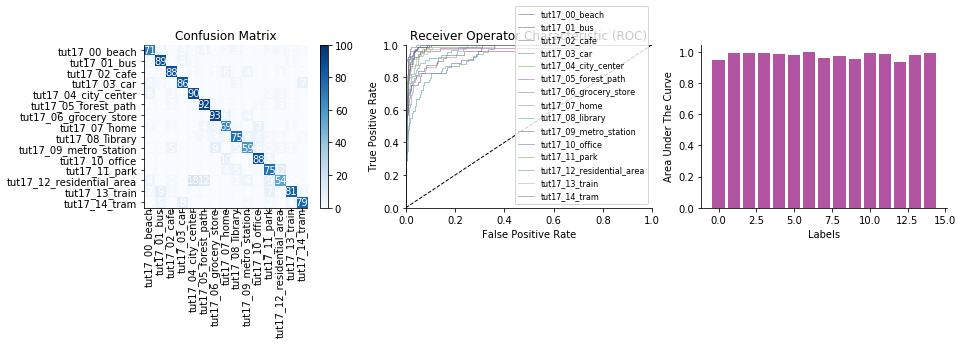

In [10]:
# PRELIMINARES 2: MODELOS CON ARQUITECTURA VARIABLE
features_dir= "J:\\DataOffline\\Datasets\\SOUND_SCENES_ALLFEATURES\\TUT17"
features = ["mfcc"]
batch_train_models(features_dir,features, classifiers, label_names, batch_size=128,n_epochs=100)